In [1]:
from datasets import load_dataset

dataset = load_dataset("kmfoda/booksum")

/home/kims90/virtual_envs/mobile_prj/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset csv (/home/kims90/.cache/huggingface/datasets/kmfoda___csv/kmfoda--booksum-025141c210e07407/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████| 3/3 [00:00<00:00, 396.77it/s]


In [3]:
dataset["test"]["chapter"][0]

'\nAll states, all powers, that have held and hold rule over men have been\nand are either republics or principalities.\n\nPrincipalities are either hereditary, in which the family has been long\nestablished; or they are new.\n\nThe new are either entirely new, as was Milan to Francesco Sforza, or\nthey are, as it were, members annexed to the hereditary state of the\nprince who has acquired them, as was the kingdom of Naples to that of\nthe King of Spain.\n\nSuch dominions thus acquired are either accustomed to live under a\nprince, or to live in freedom; and are acquired either by the arms of\nthe prince himself, or of others, or else by fortune or by ability.\n\n\n\n\nI will leave out all discussion on republics, inasmuch as in another\nplace I have written of them at length, and will address myself only to\nprincipalities. In doing so I will keep to the order indicated above,\nand discuss how such principalities are to be ruled and preserved.\n\nI say at once there are fewer difficu

In [4]:
import numpy as np
input_length = np.zeros((len(dataset["test"]["chapter"]), ))

for i in range(len(input_length)):
    input_length[i] = len(dataset["test"]["chapter"][i])

In [5]:
import pickle
#https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict-or-any-other-python-object

bert_rouge_02 = pickle.load(open("dict_pickle/bert_rouge_02.dict", "rb"))
bert_rouge_05 = pickle.load(open("dict_pickle/bert_rouge_05.dict", "rb"))
bert_rouge_07 = pickle.load(open("dict_pickle/bert_rouge_07.dict", "rb"))

In [6]:
bert_rouge_02

{'rouge-1': {'r': array([0.23699422, 0.29094828, 0.2835249 , ..., 0.24427481, 0.39106145,
         0.30877193]),
  'p': array([0.35042735, 0.31615925, 0.25170068, ..., 0.13168724, 0.13539652,
         0.17153996]),
  'f': array([0.28275862, 0.3030303 , 0.26666666, ..., 0.17112299, 0.20114942,
         0.22055137])},
 'rouge-2': {'r': array([0.04655172, 0.0686747 , 0.06575964, ..., 0.02051282, 0.04518072,
         0.06071429]),
  'p': array([0.07180851, 0.06705882, 0.05811623, ..., 0.01176471, 0.01675978,
         0.03786192]),
  'f': array([0.05648535, 0.06785714, 0.06170212, ..., 0.01495327, 0.02444987,
         0.04663923])},
 'rouge-l': {'r': array([0.19364162, 0.23706897, 0.23754789, ..., 0.22900763, 0.36871508,
         0.2877193 ]),
  'p': array([0.28632479, 0.25761124, 0.21088435, ..., 0.12345679, 0.12765957,
         0.15984405]),
  'f': array([0.23103448, 0.24691358, 0.22342342, ..., 0.1604278 , 0.18965517,
         0.20551378])}}

In [8]:
bert_rouge_02['rouge-1'['r']

SyntaxError: unexpected EOF while parsing (1310145671.py, line 1)

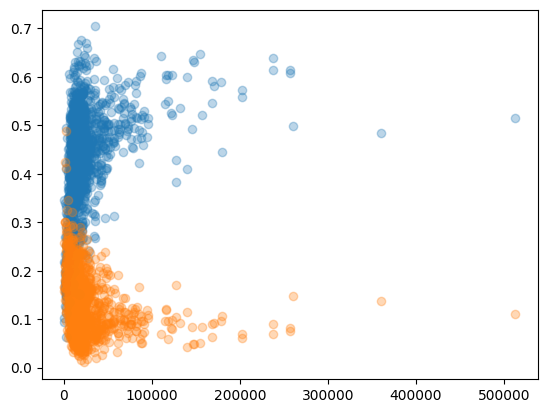

In [16]:
import matplotlib.pyplot as plt

plt.scatter(input_length, bert_rouge_05['rouge-1']['r'], alpha=0.3)
plt.scatter(input_length, bert_rouge_05['rouge-1']['p'], alpha=0.3)
#plt.scatter(input_length, bert_rouge_02['rouge-1']['f'], alpha=0.3)

plt.show()

In [18]:
li_regr = linear_model.LinearRegression()
li_regr.fit(input_length, bert_rouge_05['rouge-1']['r'])
li_regr.predict(input_length)

ValueError: Expected 2D array, got 1D array instead:
array=[19275. 29875. 16101. ... 13710. 36642. 38357.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
from sklearn import linear_model

li_regr = linear_model.LinearRegression()
li_regr.fit(input_length, bert_rouge_05['rouge-1']['r'])
plt.plot(input_length, li_regr.predict(input_length))

plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[19275. 29875. 16101. ... 13710. 36642. 38357.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.